# 準二次元不等流計算3/4：一般断面の不等流計算2-分割断面法（平均流速公式レベル2）

- [LICENSE](https://raw.githubusercontent.com/computational-sediment-hyd/NonUniformFlowModelUsingPython/main/LICENSE)

---

## はじめに

 - 前回は一般断面で用いて断面内の流速が一様である条件での計算方法を示した。
 - 今回は下図の複断面形状（低水路+高水敷）にように、断面内の領域ごとに明らかな流速差が生じる場合の計算方法として分割断面法（平均流速公式レベル2）について説明を行なう。
 
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/secttexcomp.svg)

---

 - 分割断面とは、**粗度が異なる領域ではなく、流速が異なる領域で区分する。**分割断面内で粗度が一定である必要はない。
 - 分割断面間で流れの干渉は生じないこと条件とする。
 - 分割断面法において、
    * 分割断面ごとに変わる：流速、河積、潤辺、粗度係数など
    * 分割断面ごとに変わらない：水位、エネルギー勾配

---

## 基礎式


### 平均流速公式：マニング則

前回示した流速が一様の領域の平均流速公式は以下である。

$$
\begin{align}
 v &= \dfrac{1}{n'}i_e^{1/2}R^{2/3} \\
 Q &= K i_e^{1/2} \\
 K &\equiv \dfrac{A^{5/3}}{n'S^{2/3}} \\
 n' &= \left( \dfrac{  \displaystyle \sum_{i=1}^{imax-1} S_i n_i^{3/2}}{ \displaystyle \sum_{i=1}^{imax-1} S_i } \right)^{2/3} 
\end{align}
$$

ここに、$Q$:流量、$H$：水位、$A$：河積、$v$：流速、$R=A/S$：径深、$S$：潤辺、$K$：通水能、$n'$：マニングの粗度係数（合成粗度）とする。

---

分割断面法では、各分割領域で上式が成り立つことを条件に分割断面ごとの流量$Q_n$の総和が全体の流量$Q$として次式を導出する。


$$
\begin{align}
 Q &= \sum^{n} Q_n \\
  &=  \sum^{n} K_n i_e^{1/2} \\
 K &\equiv \dfrac{A_n^{5/3}}{n_n'S_n^{2/3}} \\
\end{align}
$$

ここに、添字nは各分割断面の諸元を示す。

運動方程式の生成項が摩擦損失のみの場合、マニング則を用いると以下のとおりになる。

$$
\begin{align}
 \dfrac{\tau}{\rho g A} = \dfrac{Q^2}{\left(\displaystyle \sum^{n} K_n \right)^2}
\end{align}
$$

---

### 運動方程式

分割断面法における不等流計算の運動方程式は次式を用いる。

$$
\begin{align}
& \dfrac{d}{dx}\left( \frac{\beta Q^2}{2gA^2} + H \right) = -\dfrac{\tau}{\rho g A} 
\end{align}
$$

ここに、$Q$:流量、$H$：水位、$A=\sum A_n$：河積、$\tau$：コントロールボリュームに作用する力、$\beta$：運動量補正係数とする。

前回示した一般断面の運動方程式とほぼ同型である。
新たに追加された$\beta$：運動量補正係数について詳述しておく。

---

#### 運動量補正係数

運動量補正係数は運動方程式の導出過程で、断面積分を行う際に必要となる係数である。

断面平均流速$V$は局所流速$u$の積分で表すことができる。
分割断面法では次式となる。

$$
\begin{align}
& V = \dfrac{ \displaystyle \sum^n {u_n}A_n}{A}
\end{align}
$$

一次元の運動方程式の導出過程で、$\dfrac{ \displaystyle \sum^n {u_n^2}A_n}{A}$が現れるが、分割断面下では次式は成立しない。

$$
\begin{align}
\dfrac{ \displaystyle \sum^n {u_n^2}A_n}{A} \neq V^2 
\end{align}
$$

---

そこで次のように示す。

$$
\begin{align}
\dfrac{ \displaystyle \sum^n {u_n^2}A_n}{A} &= \beta V^2  \\
 \beta &\equiv \dfrac{ \displaystyle \sum^n {u_n^2}A_n}{V^2 A}
\end{align}
$$

このとき、$\beta$を運動量補正係数と定義する。

分割断面法の運動方程式では、運動量補正係数を考慮する必要がある。

---

#### エネルギー補正係数

同様に、エネルギー保存則においても、エネルギー補正係数$\alpha$が必要となる。

$$
\begin{align}
 \dfrac{d}{dx}\left( \dfrac{\alpha q^2}{2gh^2} + h + z_b \right) &= -i_e 
\end{align}
$$

一次元のエネルギー保存則の導出過程では、$\dfrac{ \displaystyle \sum^n {u_n^3}A_n}{A}$が現れるが、分割断面下では次式は成立しない。

$$
\begin{align}
\dfrac{ \displaystyle \sum^n {u_n^3}A_n}{A} \neq V^3 
\end{align}
$$

---

そこで次のように示す。

$$
\begin{align}
\dfrac{ \displaystyle \sum^n {u_n^3}A_n}{A} &= \alpha V^3  \\
 \alpha &\equiv \dfrac{ \displaystyle \sum^n {u_n^3}A_n}{V^3 A}
\end{align}
$$

このとき、$\alpha$をエネルギー補正係数と定義する。


分割断面法のエネルギー保存則では、エネルギー補正係数を考慮する必要がある。

---

ここで、水面形方程式を整理すると次式となる。

$$
\begin{align}
 \dfrac{d}{dx}\left( \dfrac{\alpha q^2}{2gh^2} + h + z_b \right) &= -i_e \\
- \dfrac{\alpha q^2}{gh^3}\dfrac{dh}{dx} + \dfrac{dh}{dx} + \dfrac{d z_b}{dx} &= -i_e \\
\dfrac{dh}{dx} &= \dfrac{i_b -i_e }{ 1 - \dfrac{\alpha q^2}{gh^3}} 
\end{align}
$$

水面形方程式の分母に$\alpha$が含まれるため、前々回の説明したとおり、限界水深を計算する式が変更される（詳細は後述）。

---

### 補足：井田法による合成径深

参照：[井田:広巾員開水路の定常流-断面形の影響について](https://www.jstage.jst.go.jp/article/jscej1949/1960/69/1960_69_b1/_article/-char/ja/) （わかりづらいので読まなくても良いです）

ここで、分割断面法において水深の代替として用いることが多い井田法による合成径深について説明しておく。

分割断面法による平均流速は次式で示される。

$$
\begin{align}
 Q &= \left( \sum^{n} \dfrac{1}{n'_n}R_n^{2/3} A_n \right) i_e^{1/2}
\end{align}
$$

断面全体においてもマニング則が成立するとして次式を定義する。

$$
\begin{align}
 Q &= \dfrac{1}{N}R^{2/3} i_e^{1/2} A
\end{align}
$$

ここに、$N$：断面全体のマニングの粗度係数、$R$：断面全体の径深を示す。

---

2式を連立すると次式が導出される。

$$
\begin{align}
 R &= \left( \dfrac{N}{A} \sum^{n} \dfrac{1}{n'_n}R_n^{2/3} A_n  \right)^{3/2}
\end{align}
$$

本式からわかるとおり、径深$R$と粗度係数$N$は独立していない。

井田は、水理計算上取り扱いやすいように、径深$R$と粗度係数$N$は独立させるために、
次式が成立する$N$を$N_c$と定義した。

$$
\begin{align}
  N_c \sum^{n} \dfrac{1}{n'_n}R_n^{2/3} A_n  \equiv  \sum^{n} R_n^{2/3} A_n
\end{align}
$$

よって、

$$
\begin{align}
  N_c \equiv   \dfrac{ \displaystyle \sum^{n} R_n^{2/3} A_n }{\displaystyle  \sum^{n} \dfrac{1}{n'_n}R_n^{2/3} A_n}
\end{align}
$$

---

これを元の$R$の式に代入すると$R_c$:井田法による合成径深が得られる。

$$
\begin{align}
 R_c &= \left( \dfrac { \displaystyle \sum^{n} R_n^{2/3} A_n }{A} \right)^{3/2}
\end{align}
$$

$R_c$は水位のみで決まるため、分割断面法において水深の代替として用いられることが多い。

※ $N_c$は井田による等価粗度係数、合成粗度係数などと呼ばれる。前回定義した合成粗度係数と混同しないように注意すること。

---

## 限界水深、等流水深の定義

一般断面の基礎式を用いて、限界水深、等流水深を矩形断面と同様に定義で設定することは難しいため、便宜的に以下のとおりに設定する。

---

### 等流水深

全ての損失による水頭の勾配が河床勾配$i_b$と釣り合う状態を等流と定義してその水深を等流水深とする。
なお、一般断面では水深を用いないため、等流時の水位(以下、等流水位と定義)となる。

$$
\begin{align}
 \dfrac{\tau}{\rho g A} = i_b
\end{align}
$$

生成項が摩擦損失のみの場合は、

$$
\begin{align}
 \dfrac{Q^2}{\left(\displaystyle \sum^{n} K_n \right)^2} = i_b
\end{align}
$$

となり、これを満足する水位$H$を反復法などにより求めれば良い。

---

### 限界水深

フルード数が1となる水位を限界流時の水位(以下、限界水位と定義)とする。

フルード数はエネルギー保存則の分母が0より、

$$
\begin{align}
    1 &= \dfrac{\alpha q^2}{gh^3} \\
    Fr&=  \dfrac{V}{ \sqrt{\dfrac{gh}{\alpha}}} \\
    Fr&=  \dfrac{Q}{A\sqrt{\dfrac{gh}{\alpha}} }
\end{align}
$$

となるが、平方根の中に水深$h$が含まれるため、一般断面ではそのままでは計算できない。

そのため、分割断面法では水深$h$の代替として井田の合成径深$R_c$を使用することが多い。その他には径深$R=A/S$、$A/B$を用いることもある。

参考：[FORUM8ソフトウェア：等流・不等流の計算・3DCAD Ver.9 Q&A](https://www.forum8.co.jp/faq/win/futoryuqa.htm#q1-1)

---

## 離散化

離散化は次式となる。
なお、$i$:上流側、$i-1$:下流側とする。

$$
\begin{align}
  \left(\frac{\beta_i Q^2}{2gA^2_i} + H_i  \right) 
-\left( \frac{\beta_{i-1} Q^2}{2gA_{i-1}^2} + H_{i-1}  \right) 
&= \dfrac{1}{2}\left(\dfrac{Q^2}{K_i^2} + \dfrac{Q^2}{K_{i-1}^{2}}\right)\Delta x \\
A&=\sum A_n \\
K&=\sum K_n
\end{align}
$$

常流の場合、下流から逐次計算を行なうため未知数は$H_i$のみとなる。

---

## 数値計算方法

一般断面の場合、離散式の未知数$H_i$による微分が難しいため、ニュートン法が使いづらい。そのため、二分法を使用することをおすすめする（もちろんニュートン法を使っても良い)。ただし、通常の二分法では安定的に計算することが難しいため、少し工夫が必要である。

---

## 分割断面法の応用

分割断面法では流速の異なる領域ごとに分割断面を設けるため、
高水敷と低水路という区分に限らない。
例えば、横断面内に樹林帯が存在し、著しく流速が低下する場合などはその領域に分割断面を設定しても良い。


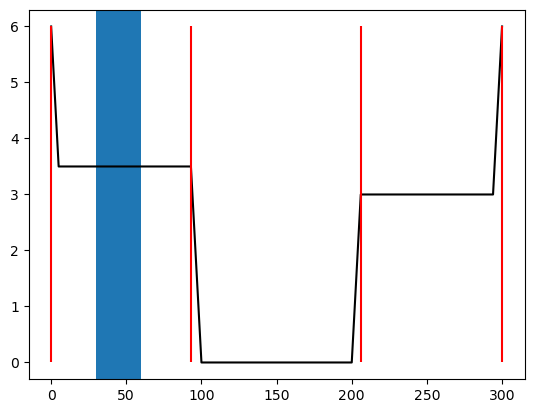

In [1]:
import matplotlib.pyplot as plt
x=[0, 5,93,100,200,206,294,300]
y=[6, 3.5, 3.5,  0,  0,  3,  3,  6]
plt.plot(x,y, c='k')
plt.vlines([0,93,206,300], ymin=0, ymax=6, color='r')
plt.axvspan(xmin=30, xmax=60)
plt.show()                # 描画

---

## 分割断面法の必要性

 - なぜ分割断面法が必要性なのか？合成粗度による方法では駄目なのか?について考える。
 - 基礎式をふまえて正しく積分するという意味は当然ある。
 - 複断面河道の流れを適切に一次元で取り扱うこと自体に相当無理がある。
 - それでも、分割断面法を使う理由は河床抵抗を適切な評価できることである。
 - 次図に水位と通水能の関係を示すが、合成粗度では高水敷付近で不連続となるが、分割断面法では解消されている。これにより、安定的に水理計算が可能となる。

---

 - 合成粗度
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/合成粗度.png)


 - 分割断面法
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/分割断面法.png)


--- 

少し考えてみよう。

下に多自然川づくりの例でよく見る横浜市のいたち川の写真を示す。写真の下（施工後）の場合、どのように水理計算を行えば良いと思いますか？

合成粗度？分割断面法？

![A](https://tenbou.nies.go.jp/science/description/images/095/095-5.jpg)
出典：（財）リバーフロント整備センター「多自然川づくり参考事例集」https://tenbou.nies.go.jp/science/description/detail.php?id=95

---

## 横断面内の流速分布の実態

 - 実験水路の計測結果を参照すると、横断面内の流速分布は水路幅と水深の比（アスペクト比）によって次図のようになる。
 - 流速分布は横断方法、鉛直方向の流れ(二次流：主流の数%程度の流れ）で大きさ決まる。
 - 現地スケールで、特に出水時の観測事例はほとんどない。
 - アスペクト比が小さい断面形状では、Velocity dipと呼ばれる最大流速位置が水面より少し下に沈むような現象が生じる。

[冨永ら1985](https://www.jstage.jst.go.jp/article/jscej1984/1985/357/1985_357_81/_article/-char/ja/)

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/tominaga1985.png)

--- 

[冨永ら1990](https://www.jstage.jst.go.jp/article/jscej1984/1990/417/1990_417_129/_article/-char/ja/)

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/tominaga1990.png)

--- 

[禰津ら1993](https://www.jstage.jst.go.jp/article/jscej1984/1993/467/1993_467_49/_article/-char/ja/)

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/03_NonUniformFlow03/ref/nezu1993.png )

---

## まとめ 

流速の異なる複数の領域を持つ河道横断形状を対象とした一次元(準二次元)不等流計算方法について説明を行った。

 - 一次元(準二次元)開水路流れの水理計算を行なう上ではここまで理解できれば十分。
 - 逆に、不等流計算に限らず、一次元不定流計算、一次元河床変動計算などで水位を正確に計算したい場合は、ここまでは考慮して欲しい。
 - 県管理河川の河道計画ではこれ以上の知識は不要。
 - 次回以降説明する平均流速レベル3は、直轄管理河川の河道計画に特化した方法で他で使うことほぼ無い。